# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import missingno
from collections import Counter

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')

In [8]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
dataset.shape

(200, 5)

# Exploratory Data Analysis (EDA)

### 3.1 Datatypes, Missing Data, and Summary Statistics


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
dataset.Pclass = dataset.Gender.astype('category')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: >

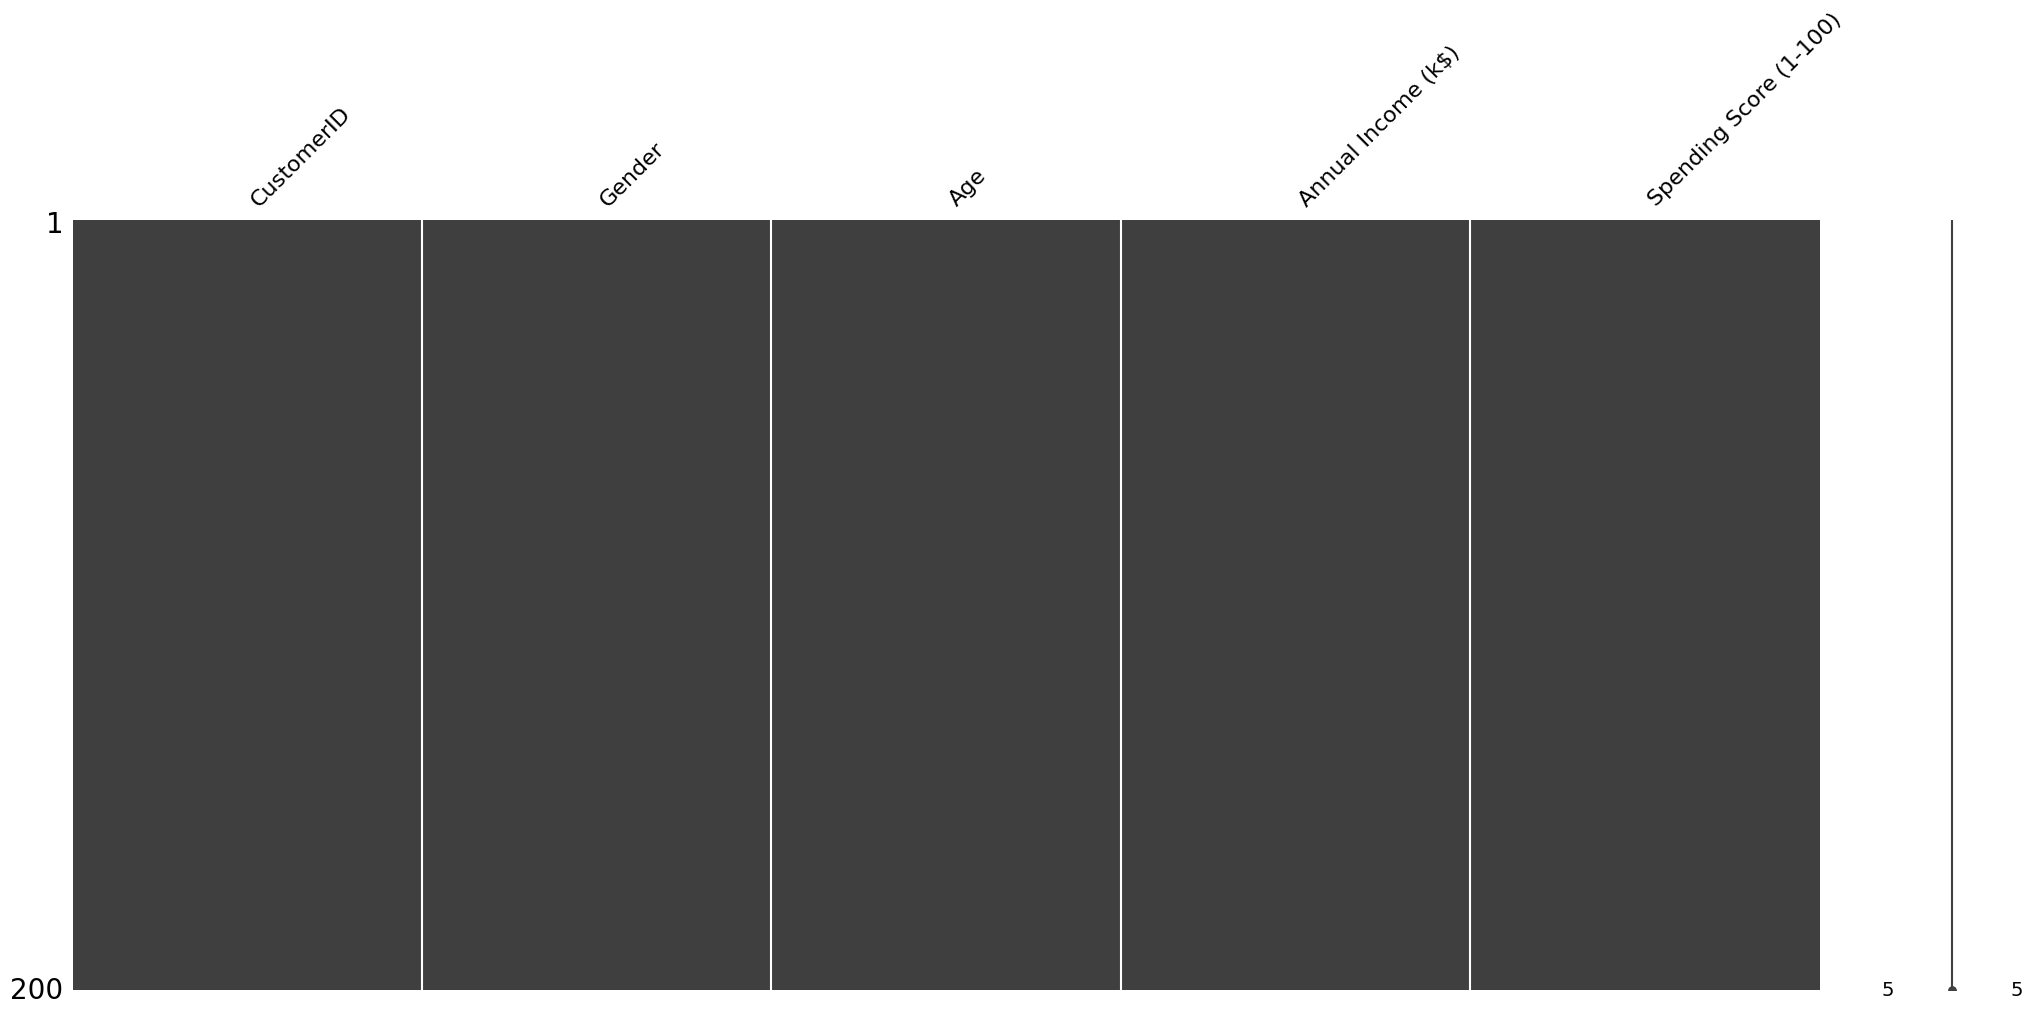

In [14]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [15]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 3.2 Feature Analysis

In [18]:
### Understanding the distribution of the numerical column

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

#### 3.2.1 Categorical variable - Gender

In [19]:
### Value counts of the column - Gender

gender_count = dataset['Gender'].value_counts(dropna = False)
gender_count

Gender
Female    112
Male       88
Name: count, dtype: int64

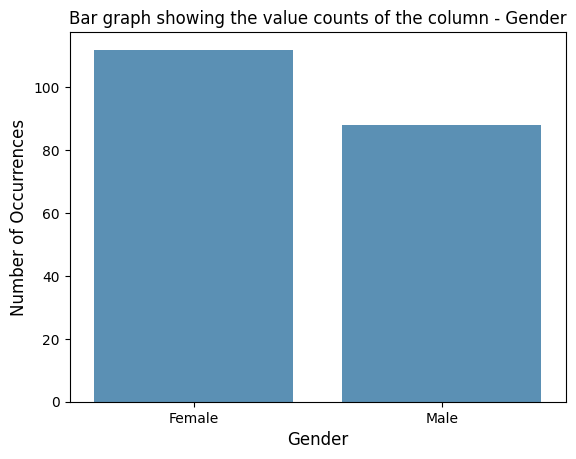

In [21]:
### Bar graph showing the value counts of the column - Gender

sns.barplot(x=gender_count.index, y=gender_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [22]:
### Mean of Annual Income by Gender

gender_income = dataset[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


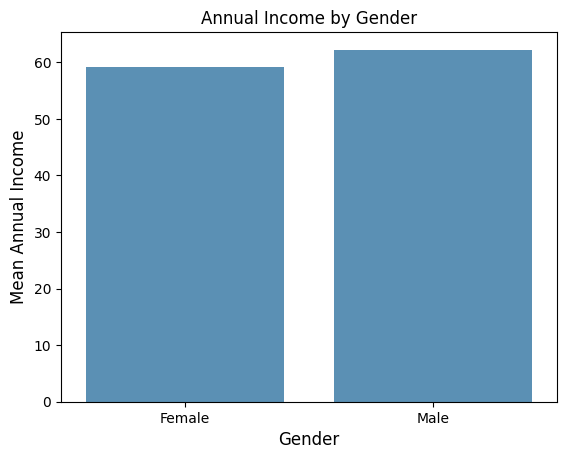

In [24]:
### Mean Annual Income by Gender

sns.barplot(x=gender_income['Gender'], y=gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [25]:
### Mean Spending Score by Gender

gender_score = dataset[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score


,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


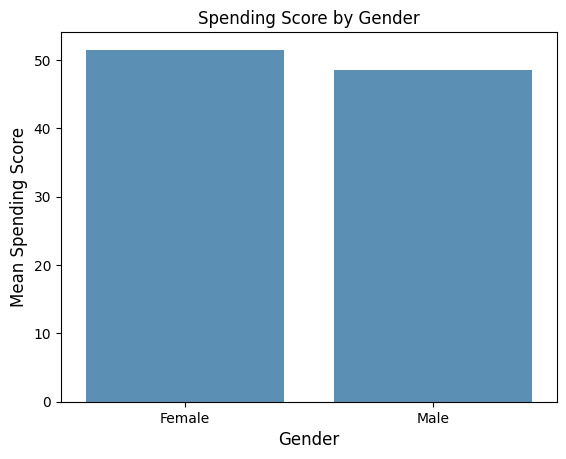

In [26]:
### Mean Spending Score by Gender

sns.barplot(x=gender_score['Gender'], y=gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [27]:
### Mean Age by Gender

gender_age = dataset[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


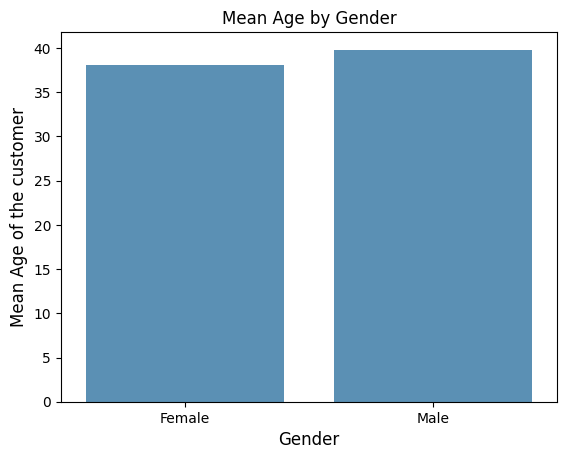

In [28]:
### Mean Age by Gender

sns.barplot(x=gender_age['Gender'], y=gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

#### 3.2.2 Numerical variable - Age

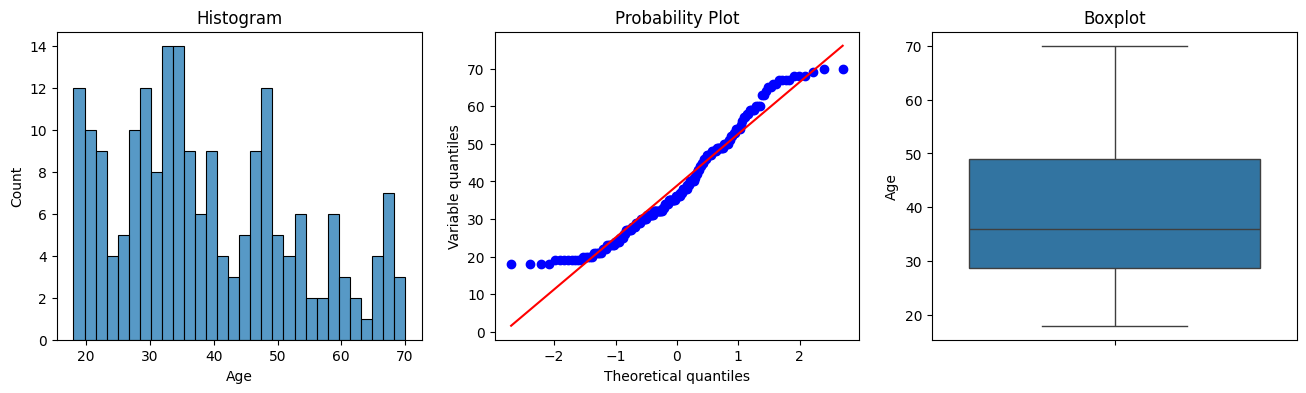

In [29]:
### Understanding the distribution of the column - Age

diagnostic_plots(dataset, 'Age')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

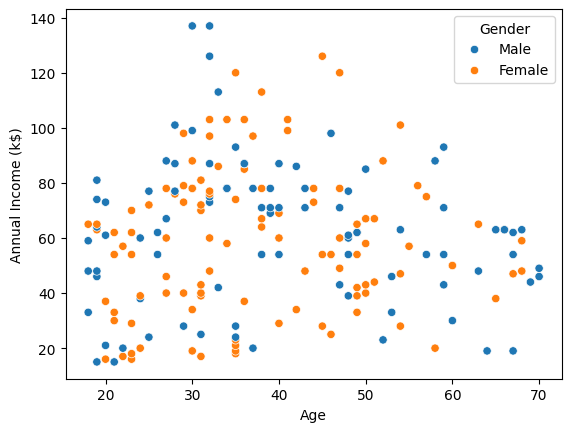

In [30]:
### Scatterplot between Age and Annual Income

sns.scatterplot(data = dataset, x = "Age", y = "Annual Income (k$)", hue = "Gender")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

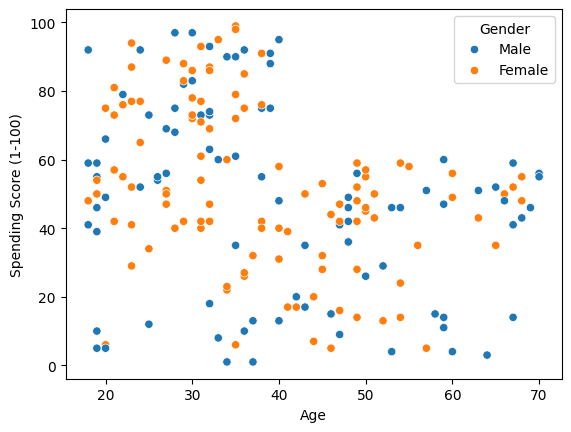

In [31]:
### Scatterplot between Age and Spending Score (1-100)

sns.scatterplot(data = dataset, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

#### 3.2.3 Numerical variable - Annual Income (k$)

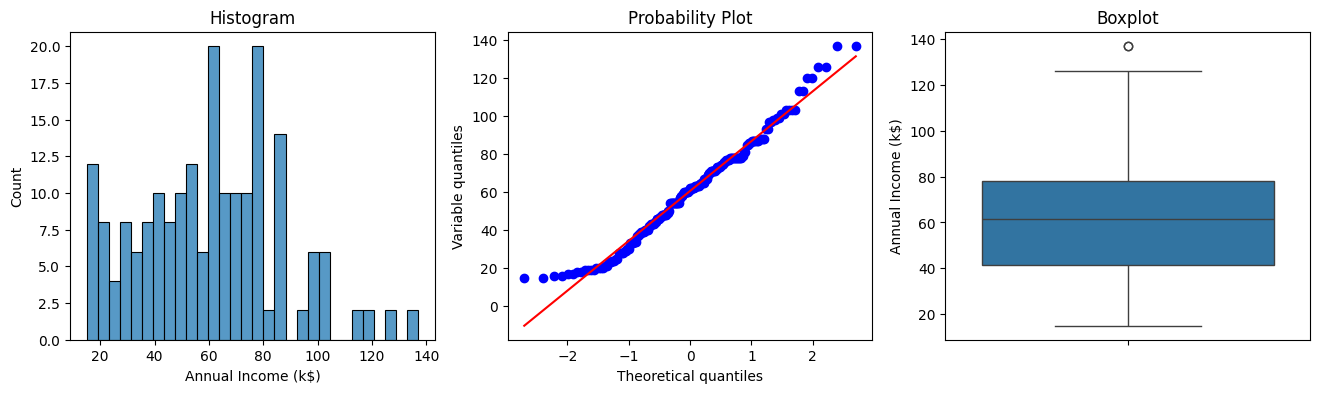

In [32]:
### Understanding the distribution of the column - Annual Income (k$)

diagnostic_plots(dataset, 'Annual Income (k$)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

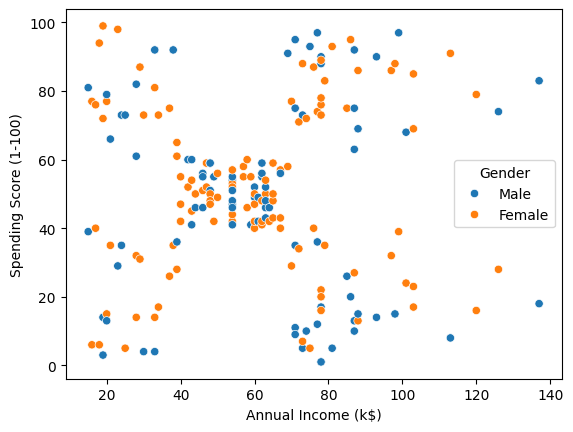

In [33]:
### Scatterplot between Annual Income and Spending Score

sns.scatterplot(data = dataset, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

#### 3.2.4 Numerical variable - Spending Score (1-100)

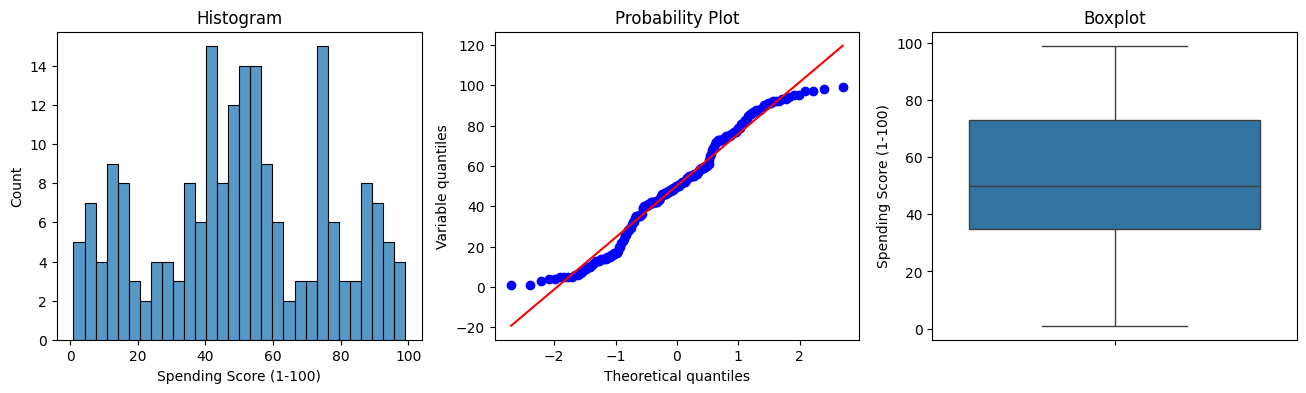

In [34]:
### Understanding the distribution of the column - Spending Score (1-100)

diagnostic_plots(dataset, 'Spending Score (1-100)')

# Data preprocessing

#### 4.1 Detect and remove outliers in numerical variables

In [36]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


#### 4.2 Drop and fill missing values

In [37]:
### Dropping the columns - CustomerId from the dataset

dataset.drop(['CustomerID'], axis = 1, inplace = True)
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Clustering

#### 5.1 Segmentation using Age and Spending Score (K- Means)

In [39]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

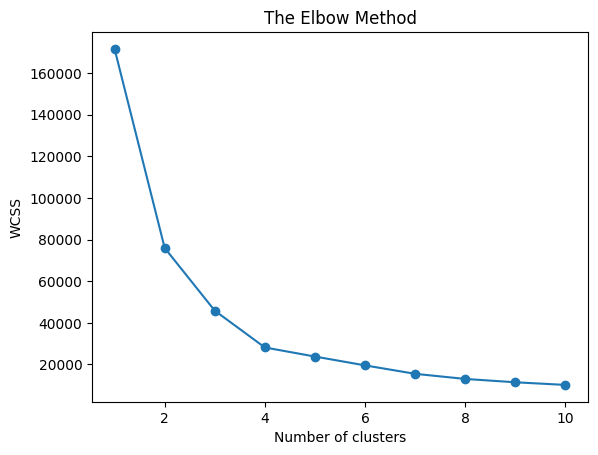

In [40]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

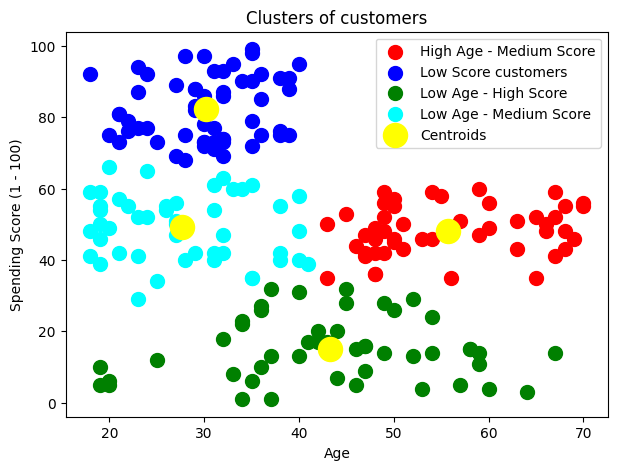

In [42]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [43]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.5
Calinski Harabasz Score : 332.56


#### 5.2 Segmentation using Age and Spending Score (Hierarchial clustering)

In [44]:
### Filtering the age and spending score from the dataset

X = dataset[['Age', 'Spending Score (1-100)']].iloc[:, :].values

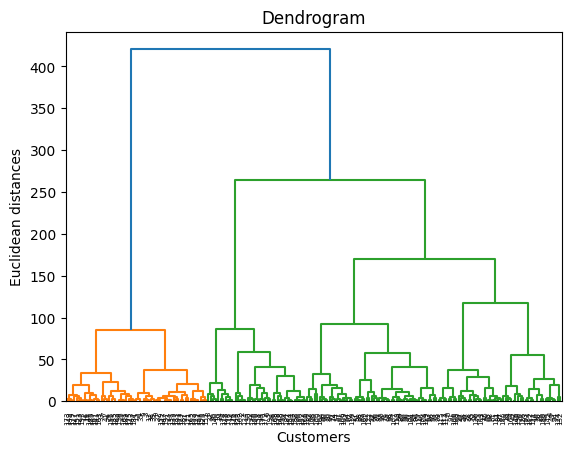

In [45]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [46]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

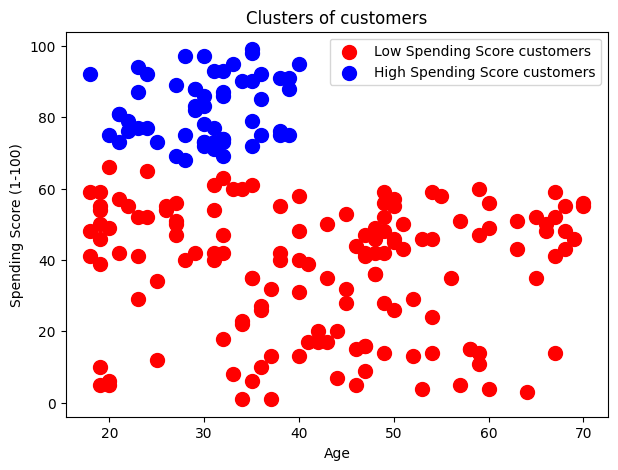

In [47]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [48]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.45
Calinski Harabasz Score : 210.56


In [49]:
### Tabulating the results

table = []
print('Segmentation using Age and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.5  │                    332.56 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.45 │                    210.56 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


#### 5.3 Segmentation using Annual Income and Spending Score (K-Means)

In [50]:
### Filtering the annual income and spending score from the dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

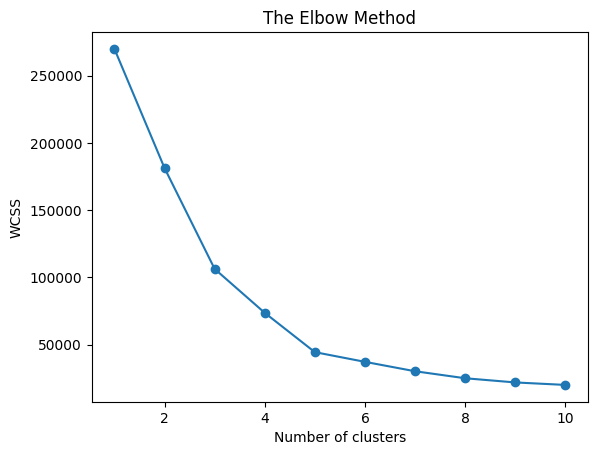

In [51]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

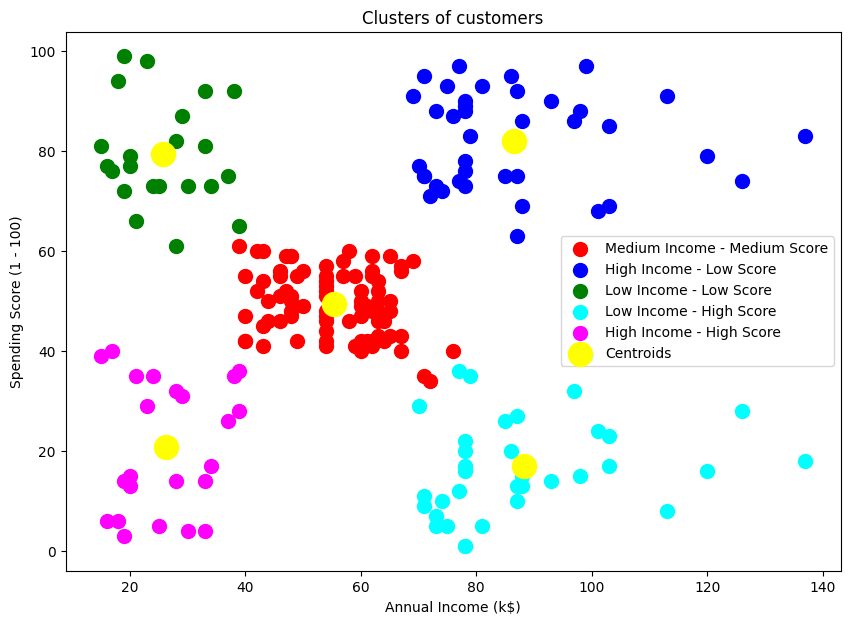

In [53]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [54]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.55
Calinski Harabasz Score : 247.36


#### 5.4 Segmentation using Annual Income and Spending Score (Hierarchial clustering)

In [56]:
### Filtering the annual income and spending score from the dataset

X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

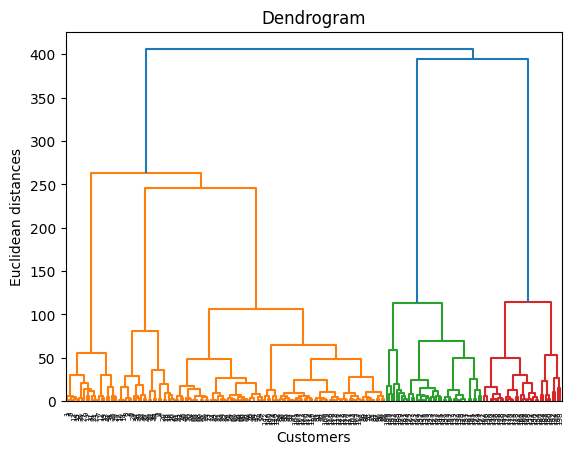

In [57]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [58]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

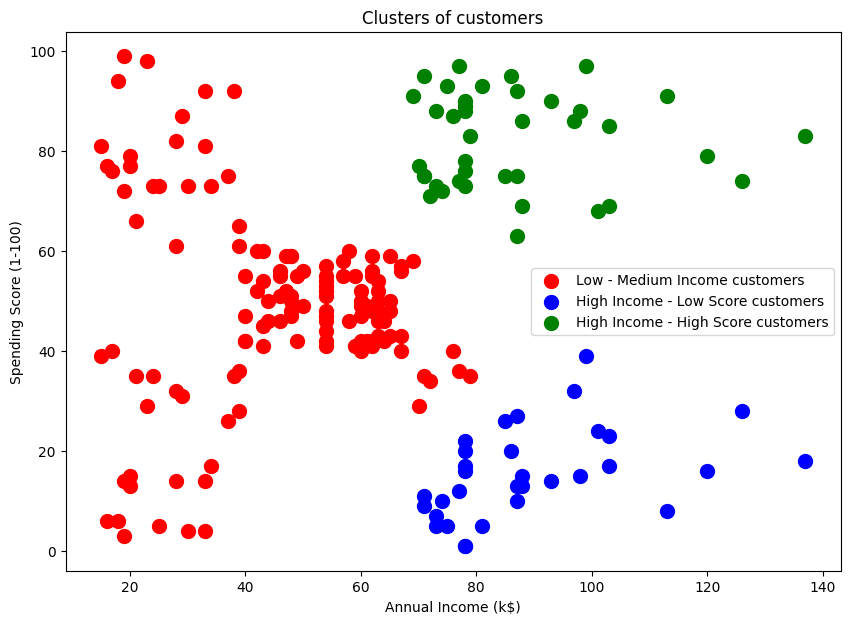

In [59]:
### Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [60]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.46
Calinski Harabasz Score : 143.82


In [61]:
### Tabulating the results

table = []
print('Segmentation using Annual Income and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Annual Income and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.55 │                    247.36 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.46 │                    143.82 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


#### 5.5 Segmentation using Age, Annual Income, and Spending Score (K-Means)

In [62]:
### Filtering the age, annual income and spending score from the dataset

X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

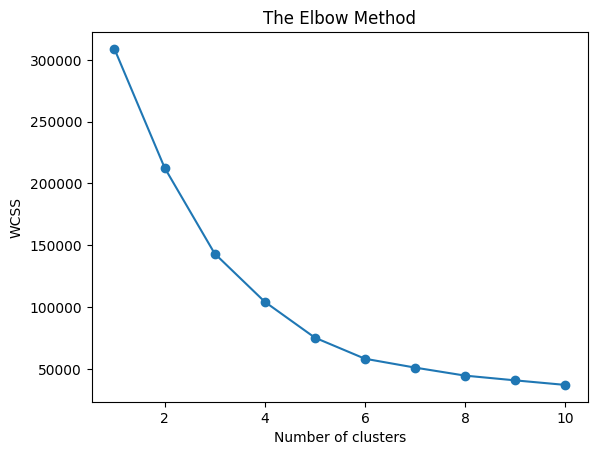

In [63]:
### Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

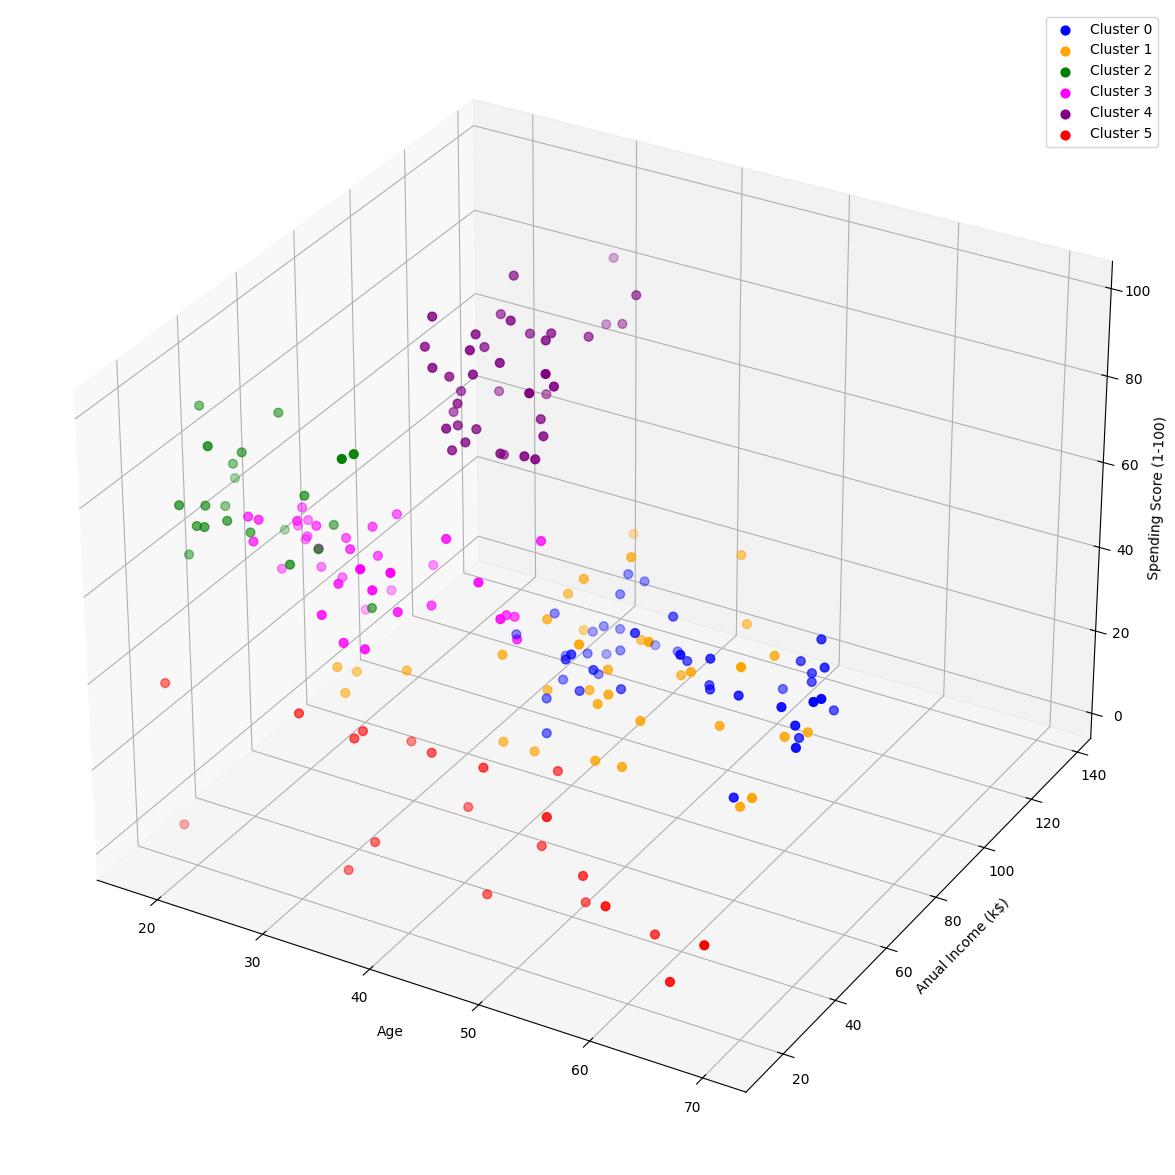

In [65]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [66]:
### Calculating the performance of the clusters

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))

Silhouette Score : 0.45
Calinski Harabasz Score : 166.72


#### 5.6 Segmentation using Age, Annual Income, and Spending Score (Hierarchial Clustering)

In [67]:
### Filtering the age, annual income and spending score from the dataset

X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

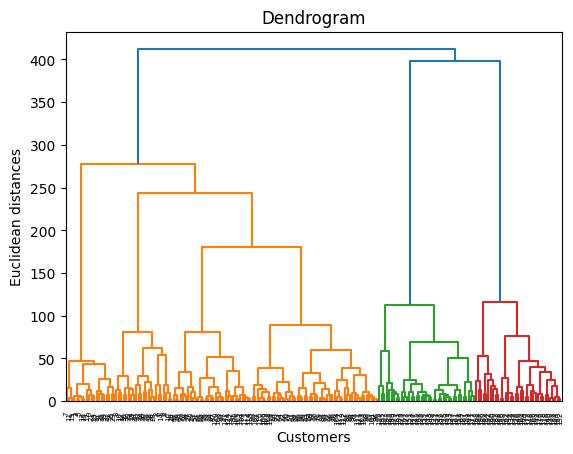

In [68]:
### Using the dendrogram to find the optimal number of clusters

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [69]:
### Training the Hierarchial clustering model on the dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

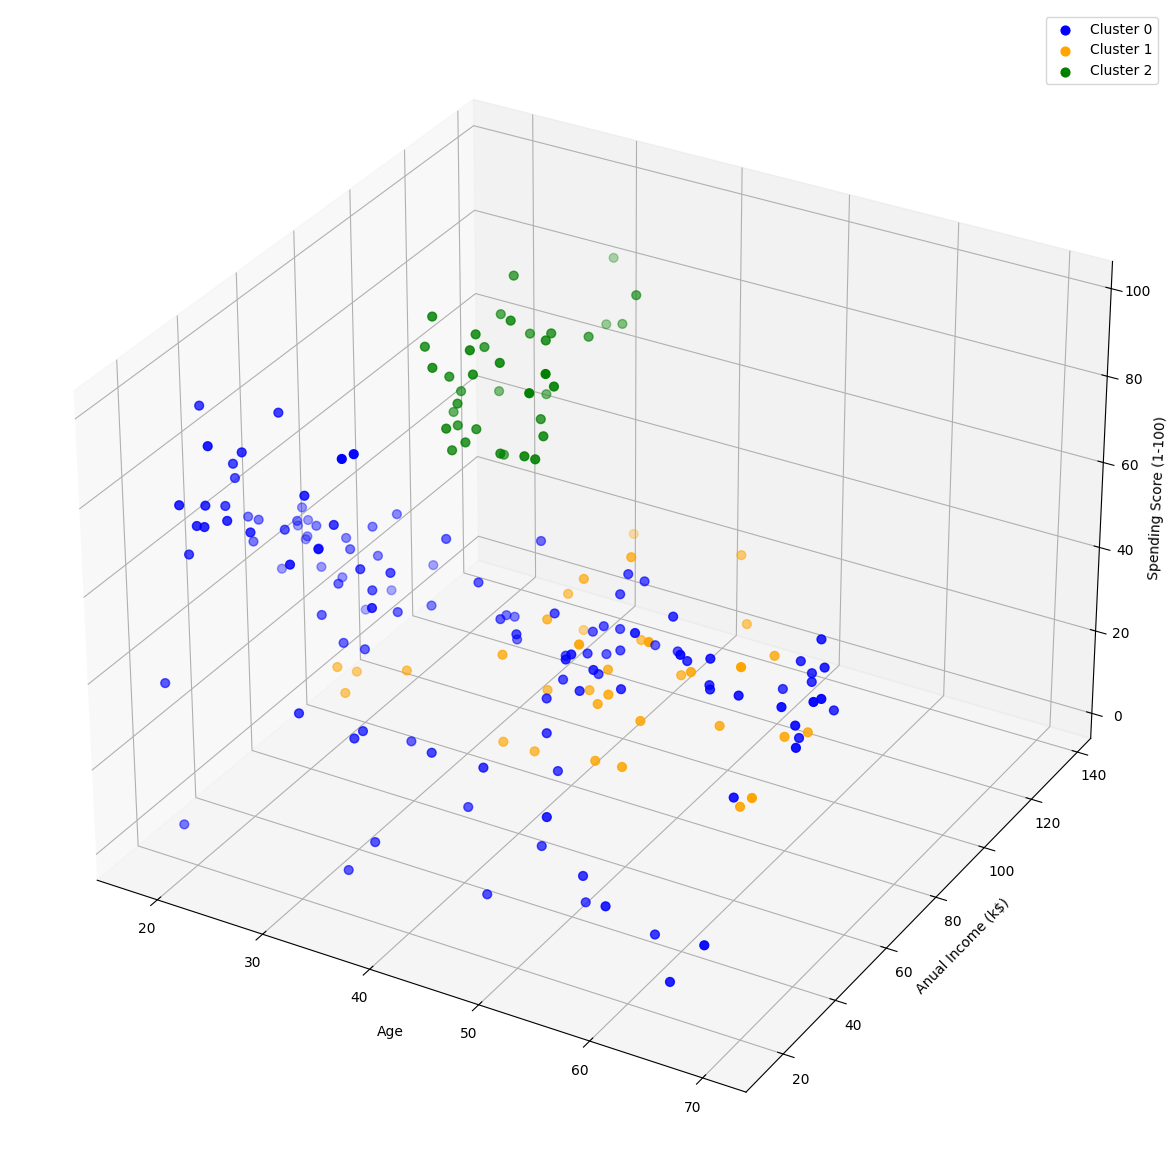

In [70]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [71]:
### Calculating the performance of the clusters

silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

print('Silhouette Score : {}'.format(silhouette_score_hc))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_hc))

Silhouette Score : 0.38
Calinski Harabasz Score : 111.46


In [72]:
### Tabulating the results

table = []
print('Segmentation using Age, Annual Income, and Spending Score')
table.append(['S.No', 'Clustering Model', 'Silhouette Score', 'Calinski Harabasz Score'])
table.append([1, 'K - Means clustering', silhouette_score_kmeans, calinski_harabasz_score_kmeans])
table.append([2, 'Hierarchial clustering', silhouette_score_hc, calinski_harabasz_score_hc])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

Segmentation using Age, Annual Income, and Spending Score
╒════════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│   S.No │ Clustering Model       │   Silhouette Score │   Calinski Harabasz Score │
╞════════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│      1 │ K - Means clustering   │               0.45 │                    166.72 │
├────────┼────────────────────────┼────────────────────┼───────────────────────────┤
│      2 │ Hierarchial clustering │               0.38 │                    111.46 │
╘════════╧════════════════════════╧════════════════════╧═══════════════════════════╛


# Conclusion

##### Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.